In [247]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [249]:
df = sns.load_dataset("titanic")

In [251]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [255]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [257]:
df.drop(columns=["embarked", "class", "alive"], inplace=True)

In [259]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


## Exploratory Data Analysis

In [262]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [264]:
df.drop(columns=["deck"], inplace = True)

<Axes: xlabel='pclass', ylabel='age'>

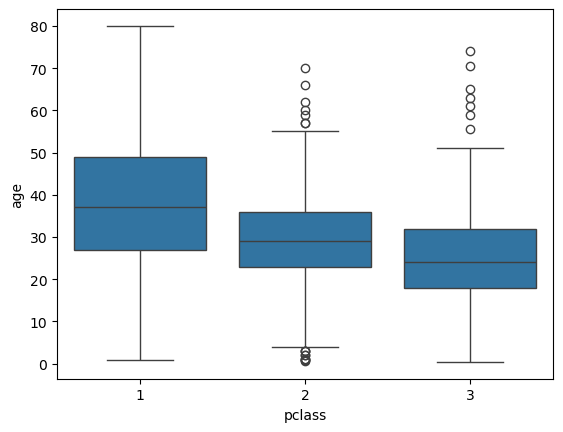

In [266]:
sns.boxplot(data=df, x=df["pclass"], y=df["age"])

In [268]:
df["age"] = df.groupby("pclass")["age"].transform(lambda x: x.fillna(x.mean()))

In [270]:
df.dropna(inplace=True)

<Axes: xlabel='survived', ylabel='count'>

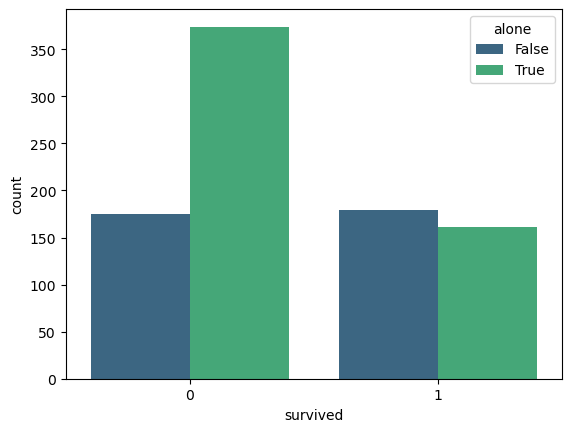

In [272]:
sns.countplot(data=df, x="survived", hue="alone", palette="viridis")

<Axes: xlabel='survived', ylabel='count'>

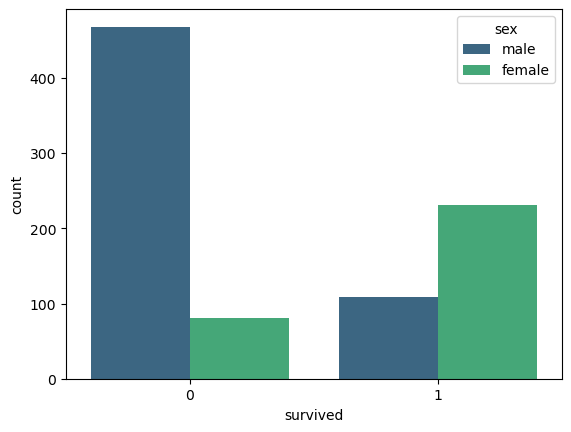

In [274]:
sns.countplot(data=df, x="survived", hue="sex", palette="viridis")

<Axes: xlabel='survived', ylabel='count'>

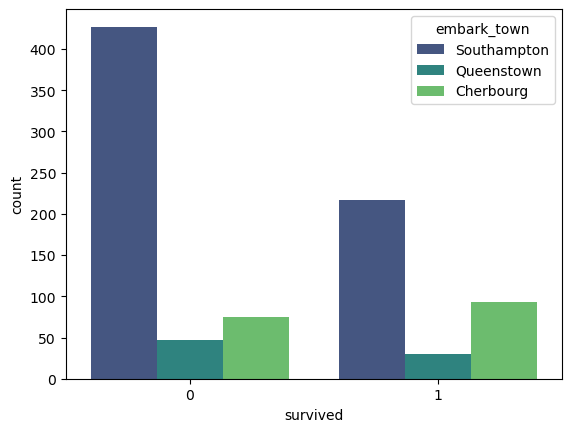

In [276]:
sns.countplot(data=df, x="survived", hue="embark_town", palette="viridis")

<Axes: xlabel='fare', ylabel='Density'>

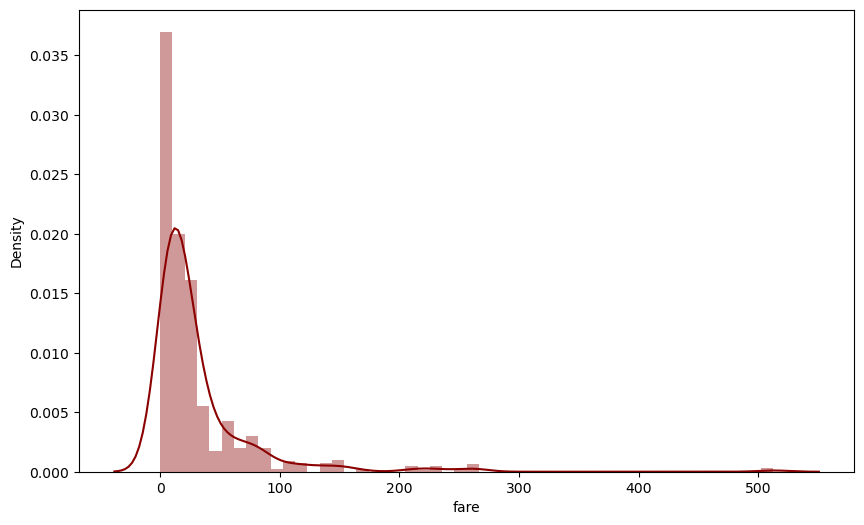

In [278]:
plt.figure(figsize=(10, 6))
sns.distplot(df["fare"], color="darkred")

<Axes: xlabel='age', ylabel='Density'>

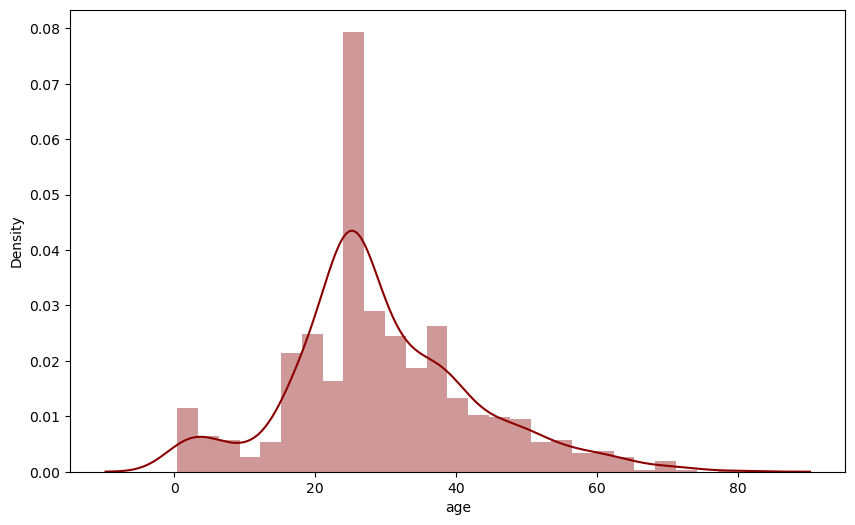

In [280]:
plt.figure(figsize=(10, 6))
sns.distplot(df["age"], color="darkred")

<Axes: >

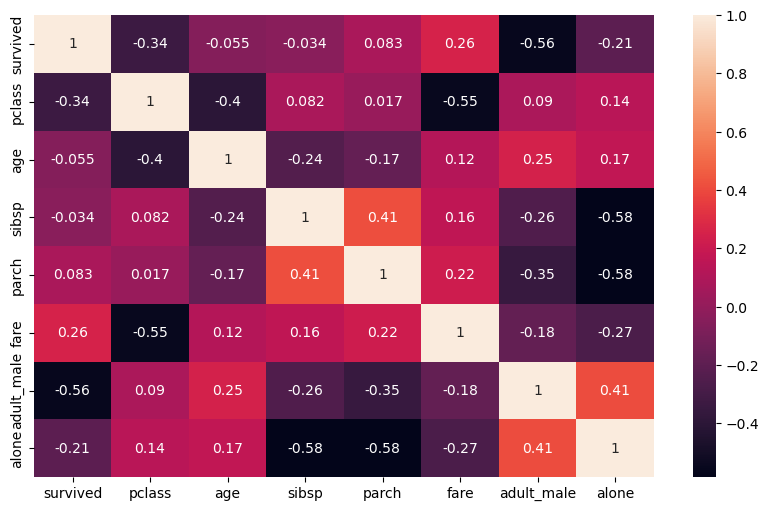

In [282]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [284]:
df.drop(columns=["age", "sibsp", "parch"], inplace=True)

In [286]:
sex = pd.get_dummies(df["sex"], drop_first=True, prefix="sex")
who = pd.get_dummies(df["who"], drop_first=True, prefix="who")
adult_male = pd.get_dummies(df["adult_male"], drop_first=True, prefix="adult_male")
embark_town = pd.get_dummies(df["embark_town"], drop_first=True, prefix="embark")
alone = pd.get_dummies(df["alone"], drop_first=True, prefix="alone")

In [288]:
df = pd.concat([df, sex, who, adult_male, embark_town, alone], axis = 1)

In [290]:
df.drop(columns=["sex", "who", "adult_male", "embark_town", "alone"], inplace= True)

In [292]:
df

,survived,pclass,fare,sex_male,who_man,who_woman,adult_male_True,embark_Queenstown,embark_Southampton,alone_True
0,0,3,7.2500,True,True,False,True,False,True,False
1,1,1,71.2833,False,False,True,False,False,False,False
2,1,3,7.9250,False,False,True,False,False,True,True
3,1,1,53.1000,False,False,True,False,False,True,False
4,0,3,8.0500,True,True,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,13.0000,True,True,False,True,False,True,True
887,1,1,30.0000,False,False,True,False,False,True,True
888,0,3,23.4500,False,False,True,False,False,True,False
889,1,1,30.0000,True,True,False,True,False,False,True


Modelling

In [310]:
X.dtypes

pclass                  int64
fare                  float64
sex_male                 bool
who_man                  bool
who_woman                bool
adult_male_True          bool
embark_Queenstown        bool
embark_Southampton       bool
alone_True               bool
dtype: object

In [296]:
from sklearn.model_selection import train_test_split

In [298]:
X = df.drop(columns=["survived"])

In [300]:
y = df["survived"]

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [304]:
from sklearn.linear_model import LogisticRegression

In [306]:
lr_model = LogisticRegression()

In [308]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [312]:
y_pred = lr_model.predict(X_test)

In [316]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [318]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       141
           1       0.68      0.79      0.73        82

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.79      0.79       223



In [320]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [322]:
cnf_matrix

array([[111,  30],
       [ 17,  65]])